In [1]:
import os
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import math
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [3]:
mydf = pd.read_csv("Data Analytics Case Competition - netflix_titles.csv")

In [4]:
mydf.shape

(7787, 12)

In [5]:
mydf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
mydf.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
mydf.dropna(inplace=True)

In [8]:
mydf.shape

(4808, 12)

In [30]:
mydf['type'].value_counts()

Movie      4673
TV Show     135
Name: type, dtype: int64

In [31]:
mydf['rating'].value_counts()

TV-MA       1665
TV-14       1133
R            654
TV-PG        413
PG-13        375
PG           238
TV-G          80
TV-Y          71
TV-Y7         69
NR            62
G             38
UR             5
TV-Y7-FV       3
NC-17          2
Name: rating, dtype: int64

### Question 1

In [9]:
mydf[mydf['country']=='India']['release_year'].value_counts().head(4)

2017    95
2018    80
2016    69
2019    68
Name: release_year, dtype: int64

In [19]:
mydf[(mydf['country']=='India') & (mydf['type']=='Movie')]['release_year'].value_counts().head(4)

2017    95
2018    79
2016    69
2019    67
Name: release_year, dtype: int64

<AxesSubplot:title={'center':'Yearwise Film/Movie Release - India'}>

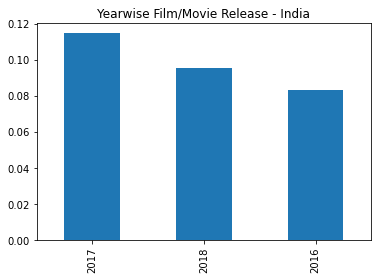

In [22]:
mydf[(mydf['country']=='India') & (mydf['type']=='Movie')]['release_year'].value_counts(4).head(3).plot.bar(figsize=(6,4), title='Yearwise Film/Movie Release - India')

### Question2

In [161]:
mydf_india = mydf[mydf['country']=='India']

In [162]:
mydf_india.shape

(832, 12)

In [163]:
mydf_india['director'].value_counts()

David Dhawan          9
Anees Bazmee          6
Ashutosh Gowariker    6
Sooraj R. Barjatya    6
Rajkumar Santoshi     6
                     ..
Abbas Tyrewala        1
Prawal Raman          1
Karthik Subbaraj      1
Santwana Bardoloi     1
Gangadhar Salimath    1
Name: director, Length: 599, dtype: int64

In [164]:
actors = []
for i in range(0,832):
    a = mydf_india.iloc[i]['cast'].split(', ')s
    actors.extend(a)

In [204]:
genre_i = []
for i in range(0,832):
    gi = mydf_india.iloc[i]['listed_in'].split(', ')
    genre_i.extend(gi)

In [165]:
actors

['Divya Dutta',
 'Atul Kulkarni',
 'Mohan Agashe',
 'Anupam Shyam',
 'Raayo S. Bakhirta',
 'Yashvit Sancheti',
 'Greeva Kansara',
 'Archan Trivedi',
 'Rajiv Pathak',
 'Rajneesh Duggal',
 'Adah Sharma',
 'Indraneil Sengupta',
 'Anjori Alagh',
 'Rajendranath Zutshi',
 'Vipin Sharma',
 'Amin Hajee',
 'Shri Vallabh Vyas',
 'Rahul Pethe',
 'Mrunmayee Deshpande',
 'Adinath Kothare',
 'Vaibhav Mangale',
 'Jaywant Wadkar',
 'Satish Pulekar',
 'Naina Apte',
 'Uday Tikekar',
 'Geetanjali Thapa',
 'Zain Khan Durrani',
 'Shray Rai Tiwari',
 'Mona Ambegaonkar',
 'Chandreyee Ghosh',
 'Barun Chanda',
 'Saheb Bhattacharjee',
 'Shefali Chauhan',
 'Samuthirakani',
 'Bharath Seeni',
 'Vinoth',
 'Esakki Barath',
 'Chemban Vinod Jose',
 'Gautham Menon',
 'Krisha Kurup',
 'Subiksha',
 'Adil Hussain',
 'Shakil Imtiaz',
 'Mahendra Rabha',
 'Sulakshana Baruah',
 'Rahul Gautam Sarma',
 'Kulada Bhattacharjya',
 'Indu Mohan Das',
 'Moumita Talukdar',
 'Soumitra Chatterjee',
 'Prasenjit Chatterjee',
 'Indrani Hald

In [166]:
len(actors)

6518

In [205]:
actors_df = pd.DataFrame(actors)
genre_i_df = pd.DataFrame(genre_i)
actors_df.head()

,0
0,Divya Dutta
1,Atul Kulkarni
2,Mohan Agashe
3,Anupam Shyam
4,Raayo S. Bakhirta


In [168]:
actors_df[0].value_counts()

Anupam Kher         39
Shah Rukh Khan      32
Amitabh Bachchan    27
Naseeruddin Shah    27
Akshay Kumar        27
                    ..
Om Kanojiya          1
Anil Nedumangad      1
Aaryan Menon         1
Mann Patel           1
Sapna Bassi          1
Name: 0, Length: 3252, dtype: int64

In [ ]:
India

In [207]:
genre_i_df[0].value_counts().head(5)

International Movies    763
Dramas                  583
Comedies                289
Independent Movies      128
Action & Adventure      124
Name: 0, dtype: int64

In [214]:
mydf_india[mydf_india['release_year']>2010]['rating'].value_counts()

TV-14       314
TV-MA       168
TV-PG        67
TV-Y7         7
NR            4
PG-13         3
TV-G          2
R             1
TV-Y7-FV      1
PG            1
Name: rating, dtype: int64

In [212]:
mydf_india[mydf_india['release_year']<2010]['rating'].value_counts()

TV-14    156
TV-PG     44
TV-MA     26
PG         2
TV-G       2
TV-Y7      1
R          1
PG-13      1
UR         1
Name: rating, dtype: int64

In [216]:
mydf_india[mydf_india['type']=='TV Show'].shape

(5, 12)

In [220]:
mydf_india[mydf_india['type']=='TV Show']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
132,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,"July 30, 2019",2019,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...
2406,s2407,TV Show,GHOUL,Patrick Graham,"Radhika Apte, Manav Kaul, Ratnabali Bhattachar...",India,"August 24, 2018",2018,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Horror",When a new prisoner at a military detention ce...
3119,s3120,TV Show,Jamtara - Sabka Number Ayega,Soumendra Padhi,"Amit Sial, Dibyendu Bhattacharya, Aksha Pardha...",India,"January 10, 2020",2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A group of small-town young men run a lucrativ...
4724,s4725,TV Show,Paava Kadhaigal,"Sudha Kongara, Vignesh Shivan, Gautham Vasudev...","Kalidas Jayaram, Shanthnu Bhagyaraj, Bhavani S...",India,"December 18, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Dramas","At times dark, at times disturbing, four short..."
6036,s6037,TV Show,Th Eena Meena Deeka Chase Comedy Show,Dheeraj Berry,"Sanjay Keni, Priya Raina",India,"March 31, 2018",2015,TV-Y7,1 Season,"Kids' TV, TV Comedies","A hungry fox and three resourceful, surprising..."


In [218]:
mydf_india[mydf_india['type']=='Movie'].shape

(827, 12)

In [224]:
mydf_india[mydf_india['type']=='Movie']['duration'].describe()

count         827
unique        117
top       137 min
freq           22
Name: duration, dtype: object

### Question 3

In [ ]:
#s285, s2131, s3952, s5292

In [33]:
mydf['date_added'].replace(' August 4, 2017','August 4, 2017',inplace=True)
mydf['date_added'].replace(' March 31, 2018','March 31, 2018',inplace=True)
mydf['date_added'].replace(' November 1, 2019','November 1, 2019',inplace=True)
mydf['date_added'].replace(' May 18, 2017','May 18, 2017',inplace=True)

In [34]:
mydf['date_added'] = pd.to_datetime(mydf['date_added'],format='%B %d, %Y',errors='coerce')

In [35]:
mydf['year_added'] = mydf['date_added'].dt.year

In [36]:
mydf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017


In [37]:
mydf['year_added'].value_counts()

2019    1337
2020    1229
2018    1114
2017     752
2016     207
2021      78
2015      50
2014      14
2011      13
2013       7
2012       3
2009       2
2008       1
2010       1
Name: year_added, dtype: int64

In [38]:
mydf_last5yrs = mydf[mydf['year_added']>2016]

In [39]:
#mydf_last5yrs contains data of past 5 years. 
mydf_last5yrs.shape

(4510, 13)

In [40]:
mydf_last5yrs.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020


In [41]:
genre = []
for i in range(0,4510):
    g = mydf_last5yrs.iloc[i]['listed_in'].split(', ')
    genre.extend(g)

In [42]:
genre

['Horror Movies',
 'International Movies',
 'Action & Adventure',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Dramas',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Horror Movies',
 'International Movies',
 'Dramas',
 'Horror Movies',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Thrillers',
 'Dramas',
 'Thrillers',
 'Documentaries',
 'International Movies',
 'Sports Movies',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Dramas',
 'International Movies',
 'Thrillers',
 'Dramas',
 'Thrillers',
 'Comedies',
 'Dramas',
 'Independent Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'Action & Adventure',
 'Dramas',
 'International Movies',
 'Dramas',
 'International Movies',
 'Dramas',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Thrillers',
 'Documentaries',
 'International Movies',
 'Dramas',
 'International Movies',
 'Romantic Movies',
 'Dramas',
 'International Movies',
 'Romantic Movies',

In [43]:
len(genre)

10119

In [44]:
genres_df = pd.DataFrame(genre)
genres_df.head()

,0
0,Horror Movies
1,International Movies
2,Action & Adventure
3,Independent Movies
4,Sci-Fi & Fantasy


In [45]:
genres_df.nunique()

0    42
dtype: int64

Globally

In [191]:
genres_df[0].value_counts().sort_values().tail(5)

Independent Movies       626
Action & Adventure       673
Comedies                1339
Dramas                  1944
International Movies    2096
Name: 0, dtype: int64

## EDA - MORE RECOMMENDATIONS

In [24]:
newdf1 = mydf[(mydf['country'] == 'India')]

In [29]:
newdf1.shape

(832, 13)

In [26]:
newdf1['month_added'] = pd.DatetimeIndex(newdf1['date_added']).month
newdf1

<ipython-input-26-f3c7e4a31dc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf1['month_added'] = pd.DatetimeIndex(newdf1['date_added']).month


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",4
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,12
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",3
20,s21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,"September 1, 2018",2018,TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...,9
21,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,"September 15, 2018",2018,TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug...",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7764,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,"May 21, 2019",2018,TV-14,159 min,"Comedies, Dramas, International Movies",Through his relationships with two wildly diff...,5
7769,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",2011,TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...,12
7776,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,"November 1, 2018",2011,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",11
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,7


In [27]:
newdf1['month_added'].value_counts()

12    102
10     95
11     84
3      79
7      70
8      70
4      69
5      65
1      62
9      54
2      44
6      38
Name: month_added, dtype: int64

<AxesSubplot:title={'center':'Month Added'}>

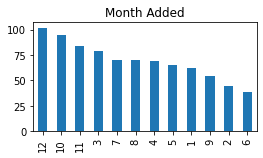

In [28]:
newdf1['month_added'].value_counts().plot.bar(figsize=(4,2), title='Month Added')

In [46]:
newdf1['rating'].value_counts()

TV-14       487
TV-MA       201
TV-PG       116
TV-Y7         8
NR            5
TV-G          4
PG-13         4
PG            3
R             2
TV-Y7-FV      1
UR            1
Name: rating, dtype: int64

<AxesSubplot:title={'center':'Month Added'}>

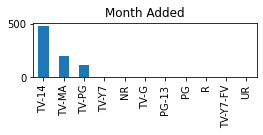

In [48]:
newdf1['rating'].value_counts().plot.bar(figsize=(4,1), title='Month Added')

India

In [55]:
q = newdf1['type'].value_counts()

In [57]:
Content_Type_India = q/832*100

In [58]:
Content_Type_India

Movie      99.399038
TV Show     0.600962
Name: type, dtype: float64

Global

In [62]:
p = mydf['type'].value_counts()
p

Movie      4673
TV Show     135
Name: type, dtype: int64

In [65]:
Content_Type_Globally = p/4808*100

In [66]:
Content_Type_Globally

Movie      97.19218
TV Show     2.80782
Name: type, dtype: float64